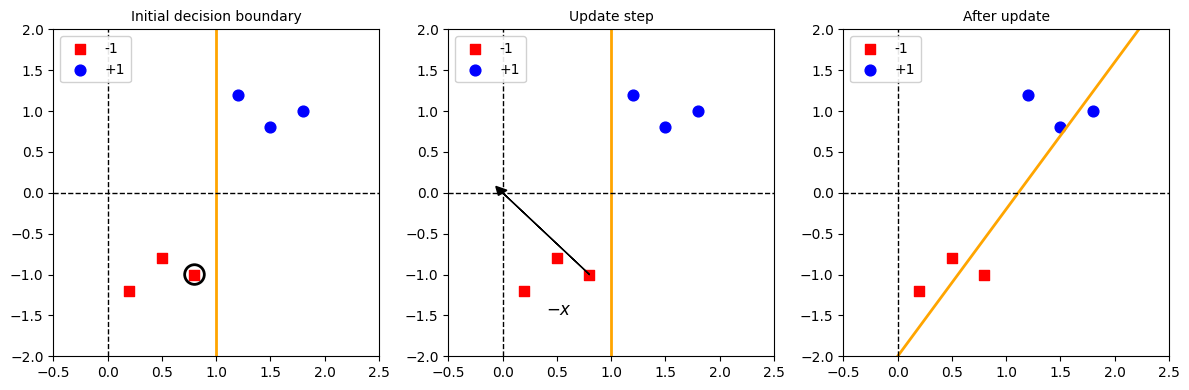

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# For simplicity, let's assume:
# Blue points (positive, +1) are clustered around (1.5, 1.0)
# Red points (negative, -1) are clustered around (0.5, -1.0)

# Define points
red_points = np.array([[0.2, -1.2],
                       [0.5, -0.8],
                       [0.8, -1.0]])
blue_points = np.array([[1.2, 1.2],
                        [1.5, 0.8],
                        [1.8, 1.0]])

# Initial weight vector w_t (just for illustration)
# We'll represent a line w_t: w_x * x + w_y * y + b = 0
# For simplicity, let's pick something that roughly separates but misclassifies one point.
w_t = np.array([1.0, 0.0])  # Normal vector of the line (pointing along x-axis)
b_t = -1.0                  # Bias term

# This line is x = 1.0 (since w_x*x+b=0 => x=1 for w_x=1,b=-1)
# Let's say it misclassifies a red point on the "wrong side" (to the right)

# After picking a misclassified red point, the update: w_{t+1} = w_t - x (if label is -1)
# Choose a misclassified point, say x = [0.8, -1.0]
x_mis = np.array([0.8, -1.0])
label_mis = -1
# Perceptron update:
w_tp1 = w_t - (label_mis * x_mis)  # w_t+1 = w_t + (-1)*x = w_t - x
# Actually, the standard perceptron rule is: w_{t+1} = w_t + y*x
# If y = -1, w_{t+1} = w_t + (-1)*x = w_t - x
# Adjust b similarly: b_{t+1} = b_t + y
b_tp1 = b_t + label_mis

# Let's define functions to plot points and lines
def plot_points_and_line(ax, red_pts, blue_pts, w, b, title):
    ax.scatter(red_pts[:,0], red_pts[:,1], c='red', marker='s', s=60, label='-1')
    ax.scatter(blue_pts[:,0], blue_pts[:,1], c='blue', marker='o', s=60, label='+1')
    # Plot line: w[0]*x + w[1]*y + b = 0 => y = (-w[0]*x - b)/w[1] if w[1]!=0
    # If w[1]=0, line is vertical: x = -b/w[0]
    x_vals = np.linspace(-0.5, 2.5, 100)
    if abs(w[1]) > 1e-9:
        y_vals = -(w[0]*x_vals + b)/w[1]
    else:
        # vertical line
        x_line = -b/w[0]
        x_vals = [x_line, x_line]
        y_vals = [-2, 2]
    ax.plot(x_vals, y_vals, 'orange', linewidth=2)
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-2, 2)
    ax.set_title(title, fontsize=10)
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    ax.legend(loc='upper left', framealpha=0.9)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Left: Initial state
plot_points_and_line(axes[0], red_points, blue_points, w_t, b_t, "Initial decision boundary")
# Highlight the misclassified red point
axes[0].scatter(x_mis[0], x_mis[1], facecolors='none', edgecolors='black', s=200, linewidth=2)

# Middle: Show the update step
# We'll show the original line and the vector x being subtracted
plot_points_and_line(axes[1], red_points, blue_points, w_t, b_t, "Update step")
# Draw arrow representing w_t -> w_t+1 as w_t - x
start = w_t
end = w_tp1
axes[1].arrow(x_mis[0], x_mis[1], -x_mis[0], -x_mis[1], 
              head_width=0.1, head_length=0.1, fc='black', ec='black')
axes[1].text(x_mis[0]-0.4, x_mis[1]-0.5, "$-x$", fontsize=12)

# Right: After update
plot_points_and_line(axes[2], red_points, blue_points, w_tp1, b_tp1, "After update")

plt.tight_layout()
plt.show()


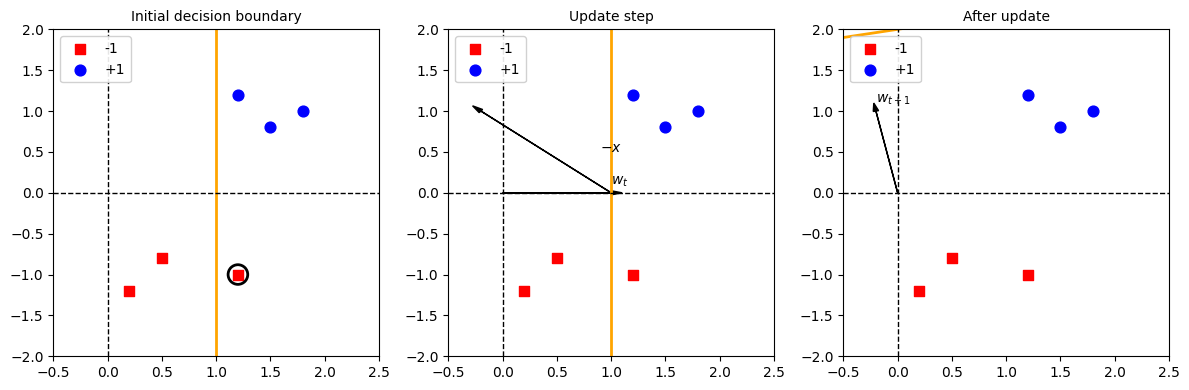

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Points setup:
# We want:
# - Red points (label = -1) mostly on the left side but at least one on the right
# - Blue points (label = +1) on the top
red_points = np.array([
    [0.2, -1.2],
    [0.5, -0.8],
    [1.2, -1.0]   # This one is on the right side of x=1 line and will be misclassified
])
blue_points = np.array([
    [1.2, 1.2],
    [1.5, 0.8],
    [1.8, 1.0]
])

# Initial weight vector and bias
# Using w_t that creates a vertical boundary line: w[0]*x + w[1]*y + b = 0
# Let w = [1,0], b=-1 => line is x=1
w_t = np.array([1.0, 0.0])
b_t = -1.0

# Determine a misclassified point:
# The line x=1 should classify points with x>1 as +1 if w=[1,0],b=-1 (since sign(w*x+b)=sign(x-1))
# The red point at (1.2, -1.0) is on the right side (x=1.2>1), so it would be predicted +1, but actually is -1.
x_mis = np.array([1.2, -1.0])
y_mis = -1  # Its true label

# Perceptron update rule: w_{t+1} = w_t + y*x, b_{t+1} = b_t + y
# Here y = -1, so w_{t+1} = w_t - x_mis
w_tp1 = w_t + y_mis * x_mis
b_tp1 = b_t + y_mis

def plot_points_and_line(ax, red_pts, blue_pts, w, b, title):
    ax.scatter(red_pts[:,0], red_pts[:,1], c='red', marker='s', s=60, label='-1')
    ax.scatter(blue_pts[:,0], blue_pts[:,1], c='blue', marker='o', s=60, label='+1')
    
    # Plot line: w[0]*x + w[1]*y + b = 0
    x_vals = np.linspace(-0.5, 2.5, 100)
    if abs(w[1]) > 1e-9:
        y_vals = -(w[0]*x_vals + b)/w[1]
    else:
        # vertical line
        x_line = -b/w[0]
        x_vals = [x_line, x_line]
        y_vals = [-2, 2]
    ax.plot(x_vals, y_vals, 'orange', linewidth=2)
    
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-2, 2)
    ax.set_title(title, fontsize=10)
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.axvline(0, color='black', linewidth=1, linestyle='--')
    ax.legend(loc='upper left', framealpha=0.9)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Left: Initial state
plot_points_and_line(axes[0], red_points, blue_points, w_t, b_t, "Initial decision boundary")
# Highlight the misclassified red point
axes[0].scatter(x_mis[0], x_mis[1], facecolors='none', edgecolors='black', s=200, linewidth=2)

# Middle: Show the update step in weight space
# We'll illustrate w_t and w_t - x as vectors in a separate "weight space" subplot overlay.
plot_points_and_line(axes[1], red_points, blue_points, w_t, b_t, "Update step")
# On top of the data space, we want to show the conceptual vector update:
# We'll use a small inset or just overlay somewhere.
# Let's place an arrow from w_t to w_t - x in a separate coordinate system: treat w as a point.
# We'll use a secondary set of coordinates or just assume w-axis same as data axis to show the concept.

# Draw the weight vectors from origin:
axes[1].arrow(0,0, w_t[0], w_t[1], head_width=0.05, head_length=0.1, fc='black', ec='black')
axes[1].text(w_t[0], w_t[1]+0.1, "$w_t$", fontsize=10)

# Arrow showing the update: w_{t+1} = w_t - x
# This is the change in w: Δw = y*x = -x
# So from w_t to w_t + Δw = w_t - x.
axes[1].arrow(w_t[0], w_t[1], -x_mis[0], -x_mis[1],
              head_width=0.05, head_length=0.1, fc='black', ec='black')
axes[1].text((w_t[0]-x_mis[0])*0.5 + w_t[0], (w_t[1]-x_mis[1])*0.5 + w_t[1], "$-x$", fontsize=10)

# Right: After update
plot_points_and_line(axes[2], red_points, blue_points, w_tp1, b_tp1, "After update")

# Show the updated weight vector w_{t+1}
axes[2].arrow(0,0, w_tp1[0], w_tp1[1], head_width=0.05, head_length=0.1, fc='black', ec='black')
axes[2].text(w_tp1[0], w_tp1[1]+0.1, "$w_{t+1}$", fontsize=10)

plt.tight_layout()
plt.show()
